,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


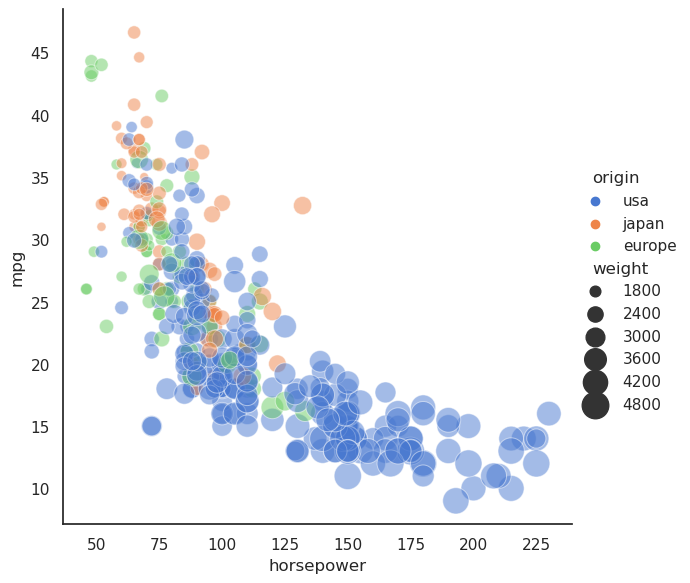

In [148]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

mpg

<Figure size 1000x600 with 0 Axes>

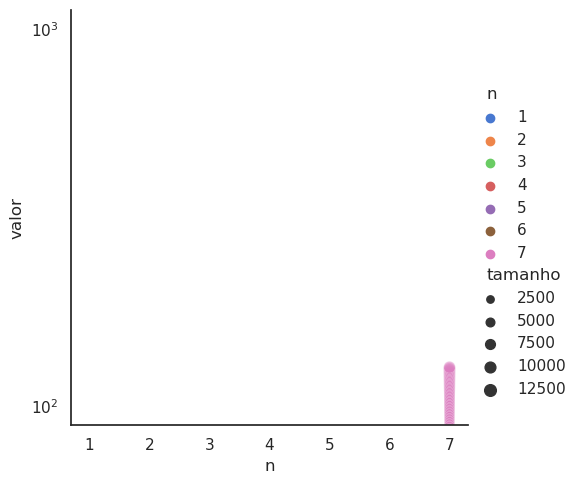

In [184]:
# Funções 
def gera_bits(n):
    return [''.join(bits) for bits in itertools.product('01', repeat=n)]

def bits_decimal(lista_bits):
    return [int(bits, 2) if bits else None for bits in lista_bits]

N=8
df = {}
for n in range(1, N):
    bits = gera_bits(n)
    decimais = bits_decimal(bits)
    df[n] = decimais  # Chaves são 1, 2, 3, 4 (sem "n=")
# Criar DataFrame
df = pd.DataFrame.from_dict(df, orient='index').transpose()
# Transformar em DataFrame (formato longo)
df_long = pd.DataFrame([(n, valor) for n, valores in df.items() for valor in valores],
                  columns=['n', 'valor'])

df_long['tamanho'] = (df_long['valor'] + 1) * 100 # Ajuste o multiplicador conforme necessário

plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     data=df_long,
#     x='n',
#     y='valor',
#     size='tamanho',  # Tamanho proporcional ao valor
#     hue='n',         # Cores baseadas em 'n'
#     alpha=0.5,
#     palette='muted'
# )



# Cria o gráfico
g = sns.relplot(
    x='n',
    y='valor',
    size='tamanho',
    hue='n',
    alpha=0.5,
    palette='muted',
    data=df_long
)

# Define o eixo y como log
g.ax.set_yscale("log")

plt.show()


# # Personalização
# plt.title("Valores Decimais por Número de Bits\n(Tamanho do Ponto = Valor Decimal)", fontsize=14)
# plt.xlabel("Número de Bits (n)", fontsize=12)
# plt.ylabel("Valor Decimal", fontsize=12)

# plt.grid(True, linestyle='--', alpha=0.3)

# # # Ajustar legenda de tamanho
# h, l = plt.gca().get_legend_handles_labels()
# plt.legend(h[1:5], l[1:5], title='n', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()
# df

In [174]:
df_long[df_long['n']==1]

,n,valor,tamanho
0,1,0.0,10000.0
1,1,1.0,20000.0
2,1,NaN,NaN
3,1,NaN,NaN
4,1,NaN,NaN
...,...,...,...
123,1,NaN,NaN
124,1,NaN,NaN
125,1,NaN,NaN
126,1,NaN,NaN
